In [1]:
import sys
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

from src.dataset import load_dataset, extract_frames


In [2]:
train_csv_path = "../data/train.csv"
df = pd.read_csv(train_csv_path)

print("Total samples:", len(df))
df.head()


Total samples: 594


,video_name,tag
0,v_CricketShot_g08_c01.avi,CricketShot
1,v_CricketShot_g08_c02.avi,CricketShot
2,v_CricketShot_g08_c03.avi,CricketShot
3,v_CricketShot_g08_c04.avi,CricketShot
4,v_CricketShot_g08_c05.avi,CricketShot


In [3]:
df.isnull().sum()

video_name    0
tag           0
dtype: int64

Class Distribution

In [4]:
class_count=df['tag'].value_counts()
class_count

tag
Punch           121
PlayingCello    120
CricketShot     118
ShavingBeard    118
TennisSwing     117
Name: count, dtype: int64

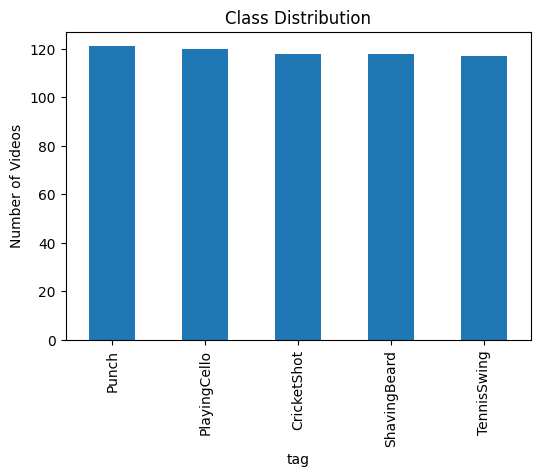

In [5]:
plt.figure(figsize=(6,4))
class_count.plot(kind="bar")
plt.title("Class Distribution")
plt.ylabel("Number of Videos")
plt.show()


Sample Video Check

In [6]:
sample_video = df.iloc[0]["video_name"]
video_path = f"../data/train/{sample_video}"

print("Video exists:", os.path.exists(video_path))
print("Video name:", sample_video)


Video exists: True
Video name: v_CricketShot_g08_c01.avi


Extract Frames from One Video

In [7]:
frames = extract_frames(video_path)

print("Frames shape:", frames.shape)
print("Min pixel:", frames.min(), "Max pixel:", frames.max())


Frames shape: (16, 112, 112, 3)
Min pixel: 0.0 Max pixel: 1.0


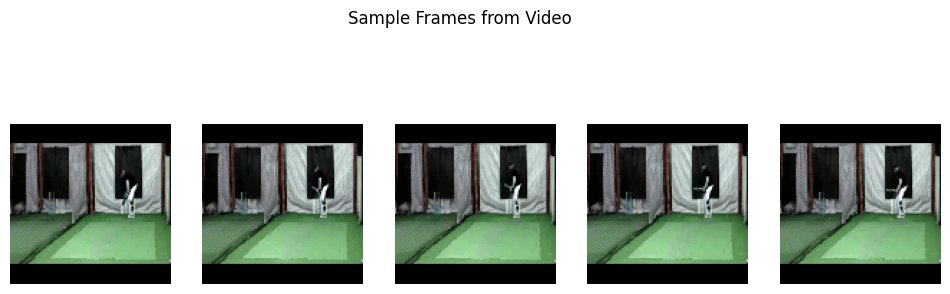

In [8]:
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(frames[i])
    plt.axis("off")
plt.suptitle("Sample Frames from Video")
plt.show()


Frame Count Experiment

In [9]:
from src.dataset import extract_frames

for n in [8, 16, 32]:
    frames_n = extract_frames(video_path, num_frames=n)
    print(f"{n} frames shape:", frames_n.shape)


8 frames shape: (8, 112, 112, 3)
16 frames shape: (16, 112, 112, 3)
32 frames shape: (32, 112, 112, 3)


Multiple Random Samples Test

In [10]:
for idx in np.random.choice(len(df), 3, replace=False):
    video_name = df.iloc[idx]["video_name"]
    path = f"../data/train/{video_name}"
    frames = extract_frames(path)
    print(video_name, "->", frames.shape)


v_TennisSwing_g25_c02.avi -> (16, 112, 112, 3)
v_PlayingCello_g25_c07.avi -> (16, 112, 112, 3)
v_ShavingBeard_g14_c03.avi -> (16, 112, 112, 3)


Memory Estimation

In [11]:
num_videos = len(df)
frames_per_video = 16
img_size = 112
channels = 3

approx_memory_gb = (
    num_videos * frames_per_video * img_size * img_size * channels * 4
) / (1024**3)

print(f"Approx RAM needed: {approx_memory_gb:.2f} GB")


Approx RAM needed: 1.33 GB


### Dataset Exploration Summary

- Total videos: 594
- Classes: 5
- Frames per video: 16
- Image size: 112×112
- Data balanced: (based on counts)
- Frame extraction: working correctly
- Normalization: correct (0–1)

✅ Dataset pipeline verified.
